<a href="https://colab.research.google.com/github/lilJdub/-/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import keras 
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from google.colab import files
import io


In [14]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['train_all.csv']))
print(df)

Saving train_all.csv to train_all (1).csv
     -0.002389937  -0.002091195  0.00100952  ...  0.001010757  0.000983676  -1
0       -0.002484     -0.002170    0.000752  ...     0.001013     0.000981  -1
1       -0.002752     -0.002469    0.000998  ...     0.001038     0.000988  -1
2       -0.002925     -0.002657    0.001240  ...     0.001069     0.001009   1
3       -0.003050     -0.002783    0.001476  ...     0.001051     0.001009   1
4       -0.002720     -0.002563    0.001219  ...     0.001028     0.001006   1
..            ...           ...         ...  ...          ...          ...  ..
474     -0.001887     -0.001211    0.000661  ...     0.001134     0.001385   1
475     -0.001840     -0.001211    0.000724  ...     0.001229     0.001433   1
476     -0.002028     -0.001431    0.000122  ...     0.001356     0.001481   1
477     -0.001761     -0.001289    0.000528  ...     0.001439     0.001572   1
478     -0.001698     -0.001352    0.000317  ...     0.001285     0.001546   1

[479 rows

In [24]:
dataset = df.values
print(dataset)

[[-2.484277e-03 -2.169811e-03  7.523100e-04 ...  1.013102e-03
   9.806900e-04 -1.000000e+00]
 [-2.751572e-03 -2.468553e-03  9.983030e-04 ...  1.038154e-03
   9.883500e-04 -1.000000e+00]
 [-2.924528e-03 -2.657233e-03  1.240006e-03 ...  1.069025e-03
   1.008567e-03  1.000000e+00]
 ...
 [-2.028302e-03 -1.430818e-03  1.218850e-04 ...  1.356135e-03
   1.481274e-03  1.000000e+00]
 [-1.761006e-03 -1.289308e-03  5.279710e-04 ...  1.439037e-03
   1.572327e-03  1.000000e+00]
 [-1.698113e-03 -1.352201e-03  3.171210e-04 ...  1.285156e-03
   1.545728e-03  1.000000e+00]]


In [25]:
X = dataset[:,0:12]
Y = dataset[:,12:13]
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(431, 12) (48, 12) (431, 2) (48, 2)


In [29]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
from keras.layers import LeakyReLU

# layer = layers.Dense(
#     units=5,
#     kernel_initializer=initializers.RandomNormal(stddev=0.01),
#     bias_initializer=initializers.Zeros()
# )
model = Sequential()
#Dense 代表是 fully connected
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(5, input_dim=12,kernel_initializer=initializers.RandomNormal(stddev=0.01), ))
#mean：均值 stddev：標準差 seed：隨機數種子
model.add(Dense(2))
#output layer has 2 nodes


In [30]:
op = keras.optimizers.SGD(learning_rate=0.0009)
model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=130, batch_size=64)

Epoch 1/130
7/7 [==============================] - 0s 2ms/step - loss: 2.4937 - accuracy: 0.6589
Epoch 2/130
7/7 [==============================] - 0s 1ms/step - loss: 0.7799 - accuracy: 0.8013
Epoch 3/130
7/7 [==============================] - 0s 2ms/step - loss: 0.7261 - accuracy: 0.8003
Epoch 4/130
7/7 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.7917
Epoch 5/130
7/7 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.8042
Epoch 6/130
7/7 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.7864
Epoch 7/130
7/7 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.8067
Epoch 8/130
7/7 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.7829
Epoch 9/130
7/7 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.7900
Epoch 10/130
7/7 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.8033
Epoch 11/130
7/7 [===========

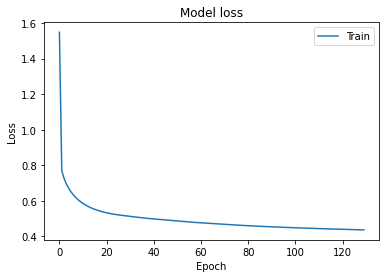

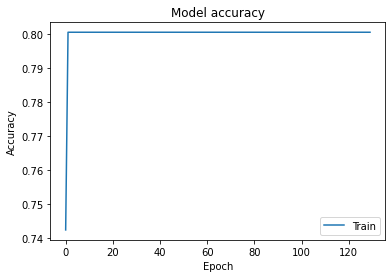

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
model.evaluate(X_test, y_test)[1]
#評估準確度 [1]=accuracy [0]=loss
#print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

2/2 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.8542


0.8541666865348816